**IMPORTING REQUIRED LIBRARIES**

In [71]:
#to ignore the warinings
import warnings
warnings.filterwarnings("ignore")

In [72]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**LOADING THE DATA**

In [73]:
#loading the data from day.csv file using read_csv function from the pandas library
day_df = pd.read_csv("day.csv")

In [74]:
day_df.shape

#There are 730 rows and 16 columns in the dataframe

(730, 16)

**UNDERSTANDING THE DATA**


In [75]:
#understanding the data using the first 5 rows of the dataframe
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [76]:
day_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [77]:
#checking information/summary of the dataframe:
day_df.info()

#There are no null values across the dataframe
#All the columns are either float or integer type except one (dteday) which is date type
#Some variables are categorical in nature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [78]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [79]:
#checking for null or missing values
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [80]:
#checking for duplicates
day_df.duplicated().sum()

0

In [81]:
#checking for unique values
day_df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

**DATA TRANSFORMATION**

In [82]:
#columns 'instant', 'dteday' do not add any value whereas 'casual' and 'registered' sum up to 'cnt', so we can drop these columns
day_df.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)

In [83]:
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [84]:
day_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [85]:
# renaming columns for better readability
day_df.rename(columns={'yr':'year','mnth':'month','hum':'humidity', 'cnt':'count'}, inplace=True)
day_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [86]:
#categorical columns
#mapping the numerical values for 'season', 'month', 'weekday', 'weathersit' columns to their corresponding string values

day_df[['season']] = day_df[['season']].apply(lambda x: x.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}))

day_df[['month']] = day_df[['month']].apply(lambda x: x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}))

day_df[['weekday']] = day_df[['weekday']].apply(lambda x: x.map({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}))

day_df[['weathersit']] = day_df[['weathersit']].apply(lambda x: x.map({1:'Clear', 2:'Cloudy', 3:'Light Rain', 4:'Heavy Rain'}))

In [87]:
day_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,Spring,0,Jan,0,Sun,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Mon,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Tue,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Wed,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Thu,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [88]:
day_df.tail()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
725,Spring,1,Dec,0,Fri,1,Cloudy,10.420847,11.33210,65.2917,23.458911,2114
726,Spring,1,Dec,0,Sat,1,Cloudy,10.386653,12.75230,59.0000,10.416557,3095
727,Spring,1,Dec,0,Sun,0,Cloudy,10.386653,12.12000,75.2917,8.333661,1341
728,Spring,1,Dec,0,Mon,0,Clear,10.489153,11.58500,48.3333,23.500518,1796
729,Spring,1,Dec,0,Tue,1,Cloudy,8.849153,11.17435,57.7500,10.374682,2729


**Exploratory Data Analysis (EDA)**

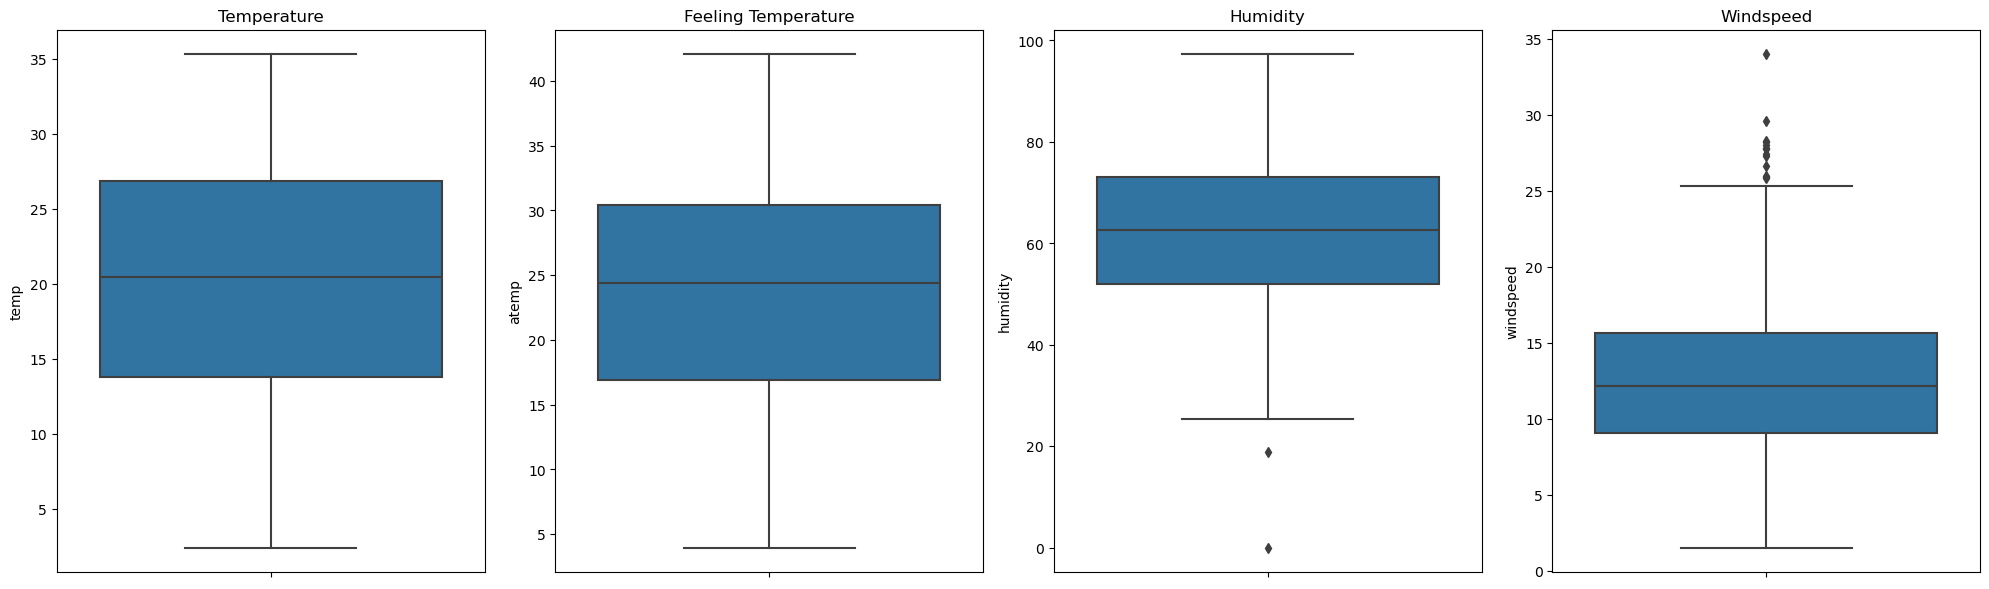

In [89]:
#visualizing numerical columns using boxplots
#checking for outliers in numerical columns

plt.figure(figsize=(20, 6))

# Box plots for numerical variables
plt.subplot(1, 4, 1)
sns.boxplot(y='temp', data=day_df)
plt.title('Temperature')

plt.subplot(1, 4, 2)
sns.boxplot(y='atemp', data=day_df)
plt.title('Feeling Temperature')

plt.subplot(1, 4, 3)
sns.boxplot(y='humidity', data=day_df)
plt.title('Humidity')

plt.subplot(1, 4, 4)
sns.boxplot(y='windspeed', data=day_df)
plt.title('Windspeed')

plt.tight_layout()
plt.show()

#no major outliers observed in below boxplots

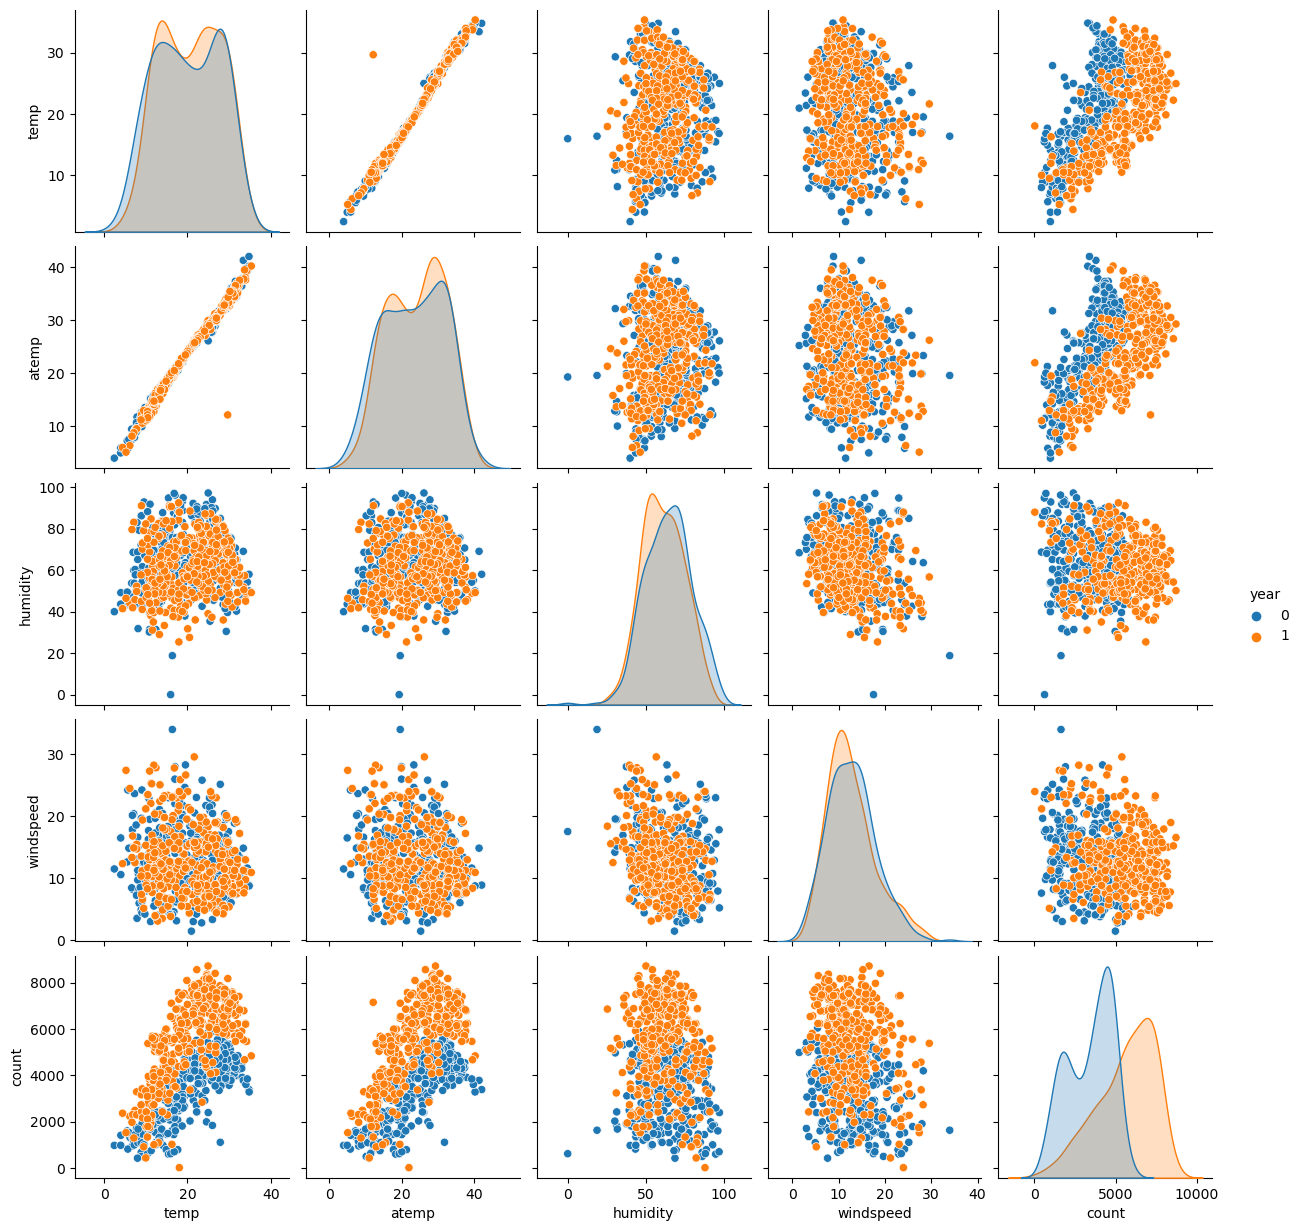

In [90]:
#visualizing numerical columns using pairplots
sns.pairplot(day_df, vars=['temp', 'atemp', 'humidity', 'windspeed', 'count'], hue = 'year')
plt.show()

#Linear relationship between 'temp' & 'atemp' as they are highly correlated with each other, we can drop 'atemp'
#'count' is also correlated with 'temp' & 'atemp'
#bike rental is higher in 2019 than in 2018

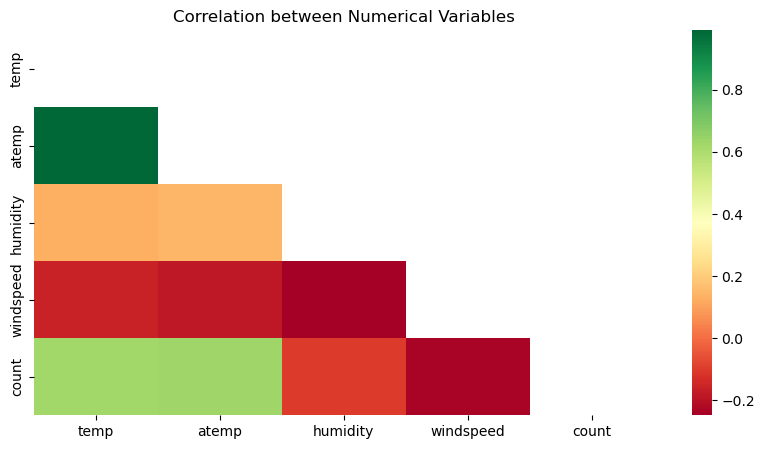

In [91]:
#checking the correlation between the numerical variables

plt.figure(figsize = (10,5))
matrix = np.triu(day_df[['temp','atemp','humidity','windspeed','count']].corr())
sns.heatmap(day_df[['temp','atemp','humidity','windspeed','count']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

In [92]:
day_df.drop('atemp', axis=1, inplace=True)

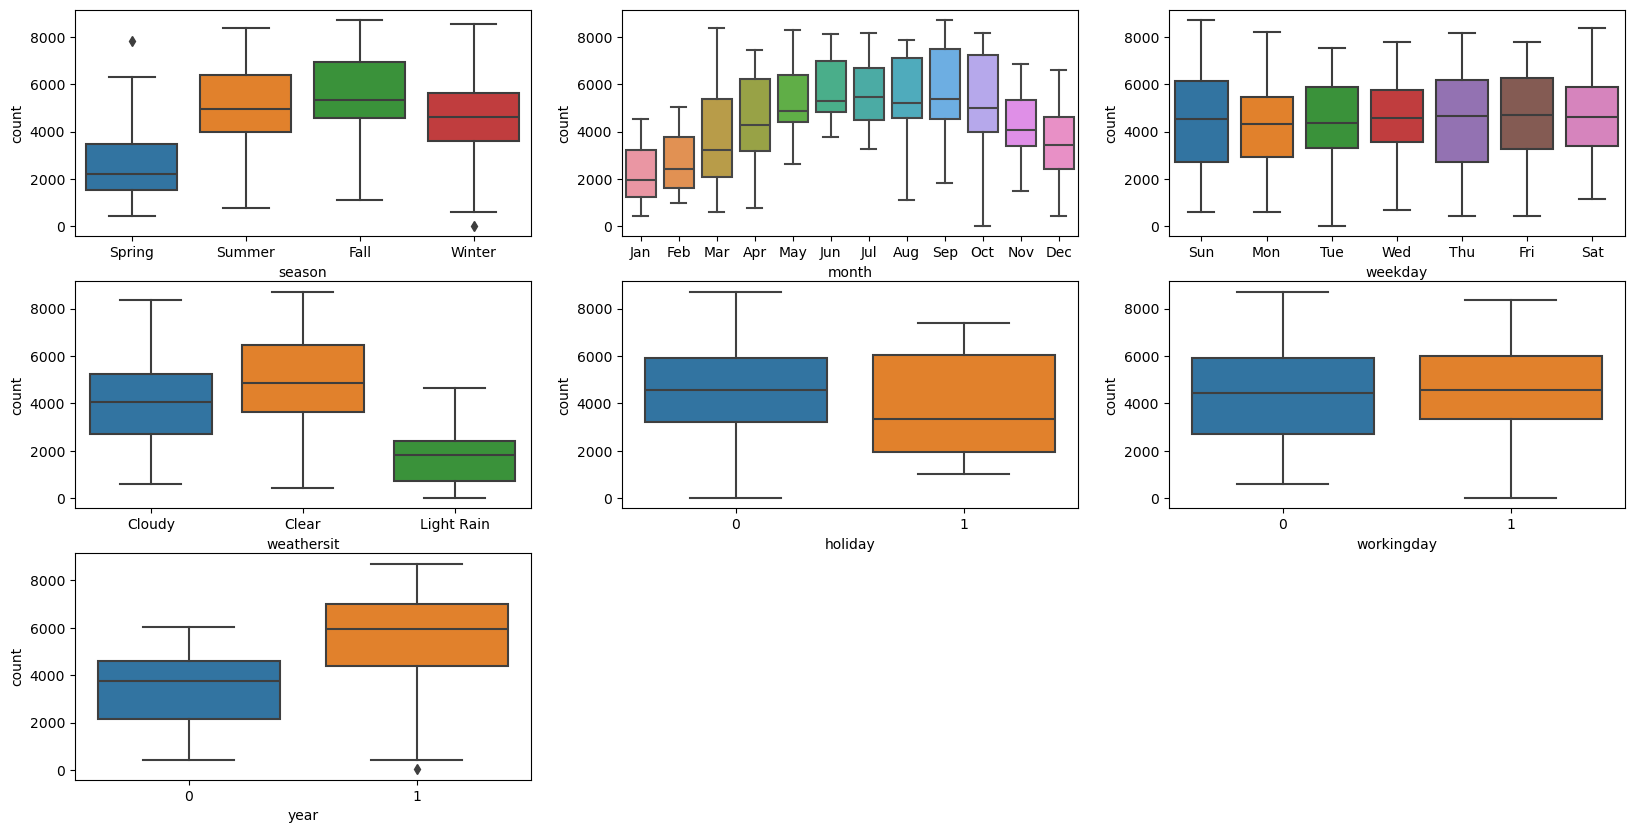

In [93]:
#visualizing categorical columns

plt.figure(figsize=(20, 10))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'count', data = day_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'month', y = 'count', data = day_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'count', data = day_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'count', data = day_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'count', data = day_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'count', data = day_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'year', y = 'count', data = day_df)
plt.show()

In [94]:
#Highest demand for rentals in fall
#Steady increase in demand until June, with a peak in September
#No significant variation during weekdays, indicating a steady market
#Demand spikes during clear weather
#Rentals decrease during holidays
#Noticeable growth in demand for the following year

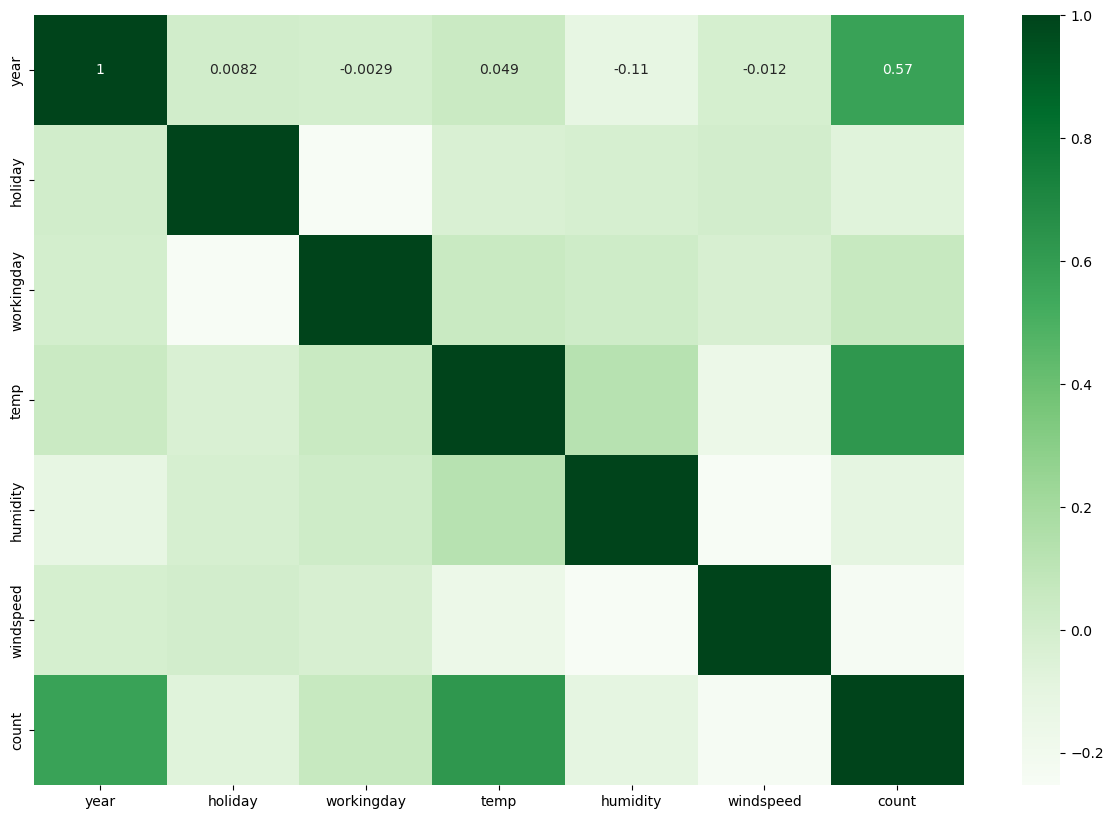

In [95]:
#heatmap to check correlationship

correlation_matrix = day_df.corr(numeric_only=True)
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='Greens', annot=True)
plt.show()

#'count' is correlated with 'year' and 'temp'

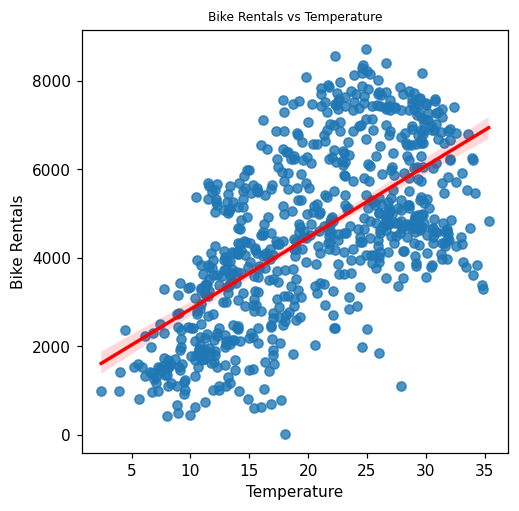

In [96]:
#analyzing the relationship between 'count' and 'temp'
plt.figure(figsize=(5, 5), dpi=110)
plt.title("Bike Rentals vs Temperature", fontsize=8)
sns.regplot(data=day_df, y='count', x='temp', line_kws={"color": "red"})
plt.xlabel("Temperature")
plt.ylabel("Bike Rentals")
plt.show()

#positive linear relationship between 'count' and 'temp'

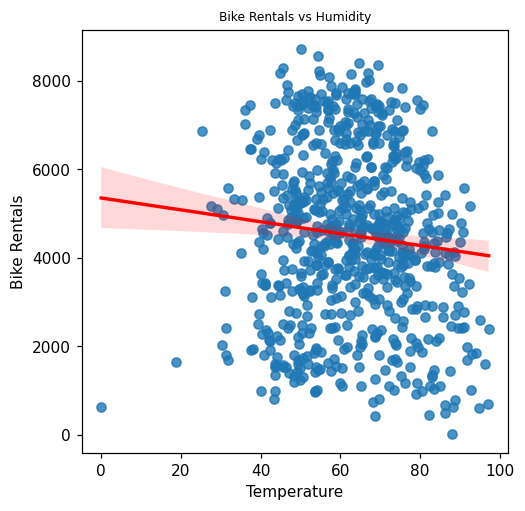

In [97]:
#analyzing the relationship between 'count' and 'humidity'
plt.figure(figsize=(5, 5), dpi=110)
plt.title("Bike Rentals vs Humidity", fontsize=8)
sns.regplot(data=day_df, y='count', x='humidity', line_kws={"color": "red"})
plt.xlabel("Temperature")
plt.ylabel("Bike Rentals")
plt.show()

#negative relationship between 'count' and 'humidity'

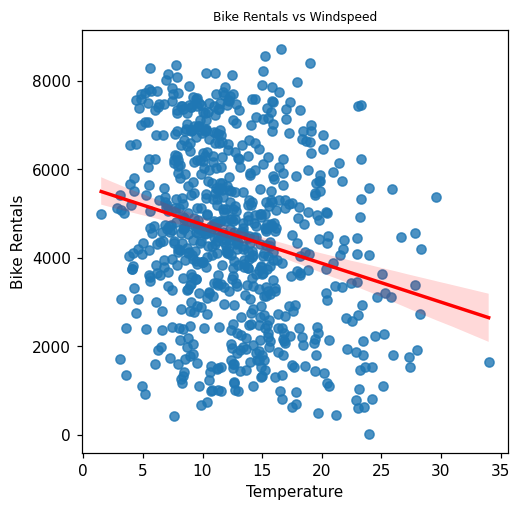

In [98]:
#analyzing the relationship between 'count' and 'windspeed'
plt.figure(figsize=(5, 5), dpi=110)
plt.title("Bike Rentals vs Windspeed", fontsize=8)
sns.regplot(data=day_df, y='count', x='windspeed', line_kws={"color": "red"})
plt.xlabel("Temperature")
plt.ylabel("Bike Rentals")
plt.show()

#negative relationship between 'count' and 'windspeed'

**DATA PREPARATION FOR THE MODEL**

In [100]:
#dummy Variable Creation

months=pd.get_dummies(day_df.month,drop_first=True)
weekdays=pd.get_dummies(day_df.weekday,drop_first=True)
weather=pd.get_dummies(day_df.weathersit,drop_first=True)
seasons=pd.get_dummies(day_df.season,drop_first=True)

In [101]:
day_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,Spring,0,Jan,0,Sun,0,Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Mon,0,Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Tue,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Wed,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Thu,1,Clear,9.305237,43.6957,12.522300,1600


In [103]:
#merging the Dataframes

day_df=pd.concat([day_df,months,weekdays,weather,seasons],axis=1)
day_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,...,Sat,Sun,Thu,Tue,Wed,Cloudy,Light Rain,Spring,Summer,Winter
0,Spring,0,Jan,0,Sun,0,Cloudy,14.110847,80.5833,10.749882,...,False,True,False,False,False,True,False,True,False,False
1,Spring,0,Jan,0,Mon,0,Cloudy,14.902598,69.6087,16.652113,...,False,False,False,False,False,True,False,True,False,False
2,Spring,0,Jan,0,Tue,1,Clear,8.050924,43.7273,16.636703,...,False,False,False,True,False,False,False,True,False,False
3,Spring,0,Jan,0,Wed,1,Clear,8.200000,59.0435,10.739832,...,False,False,False,False,True,False,False,True,False,False
4,Spring,0,Jan,0,Thu,1,Clear,9.305237,43.6957,12.522300,...,False,False,True,False,False,False,False,True,False,False


In [107]:
#converting all columns to numeric values

day_df = day_df.apply(pd.to_numeric, errors='coerce')
day_df = day_df.fillna(0)

# Check for any remaining non-numeric data
if day_df.select_dtypes(include=['object']).empty:
    print("Numeric")
else:
    print("Non-numeric.")

# Convert boolean columns to numeric (0 and 1)
day_df = day_df.applymap(lambda x: 1 if x is True else (0 if x is False else x))

Numeric


In [108]:
day_df.head()

#all columns have beem converted to numeric values

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,...,Sat,Sun,Thu,Tue,Wed,Cloudy,Light Rain,Spring,Summer,Winter
0,0.0,0,0.0,0,0.0,0,0.0,14.110847,80.5833,10.749882,...,0,1,0,0,0,1,0,1,0,0
1,0.0,0,0.0,0,0.0,0,0.0,14.902598,69.6087,16.652113,...,0,0,0,0,0,1,0,1,0,0
2,0.0,0,0.0,0,0.0,1,0.0,8.050924,43.7273,16.636703,...,0,0,0,1,0,0,0,1,0,0
3,0.0,0,0.0,0,0.0,1,0.0,8.200000,59.0435,10.739832,...,0,0,0,0,1,0,0,1,0,0
4,0.0,0,0.0,0,0.0,1,0.0,9.305237,43.6957,12.522300,...,0,0,1,0,0,0,0,1,0,0


In [109]:
#dropping 'season','month','weekday','weathersit' as dummies have been created for the columns

day_df.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
day_df.head()

,year,holiday,workingday,temp,humidity,windspeed,count,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Cloudy,Light Rain,Spring,Summer,Winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,1,0,0,0,0,1,0,0


**SPLITING THE DATA INTO TRAIN AND TEST SET**

In [110]:
from sklearn.model_selection import train_test_split

day_df_train, day_df_test = train_test_split(day_df, train_size = 0.7, random_state = 100)

In [111]:
#checking number of rows and columns after split

print(day_df_train.shape)
print(day_df_test.shape)

(510, 29)
(220, 29)


In [115]:
from sklearn.preprocessing import MinMaxScaler

In [117]:
#using MinMaxScaler to rescale the features
scaler = MinMaxScaler()

#fit on data
#applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','humidity','windspeed','count']
day_df_train[num_vars] = scaler.fit_transform(day_df_train[num_vars])

In [118]:
day_df_train.head()

,year,holiday,workingday,temp,humidity,windspeed,count,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Cloudy,Light Rain,Spring,Summer,Winter
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,0,1,0,0,0,1,0,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,1,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,...,0,1,0,0,0,1,0,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [120]:
day_df_train.describe()

,year,holiday,workingday,temp,humidity,windspeed,count,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Cloudy,Light Rain,Spring,Summer,Winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,...,0.127451,0.154902,0.158824,0.150980,0.131373,0.345098,0.029412,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,...,0.333805,0.362166,0.365870,0.358381,0.338139,0.475867,0.169124,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


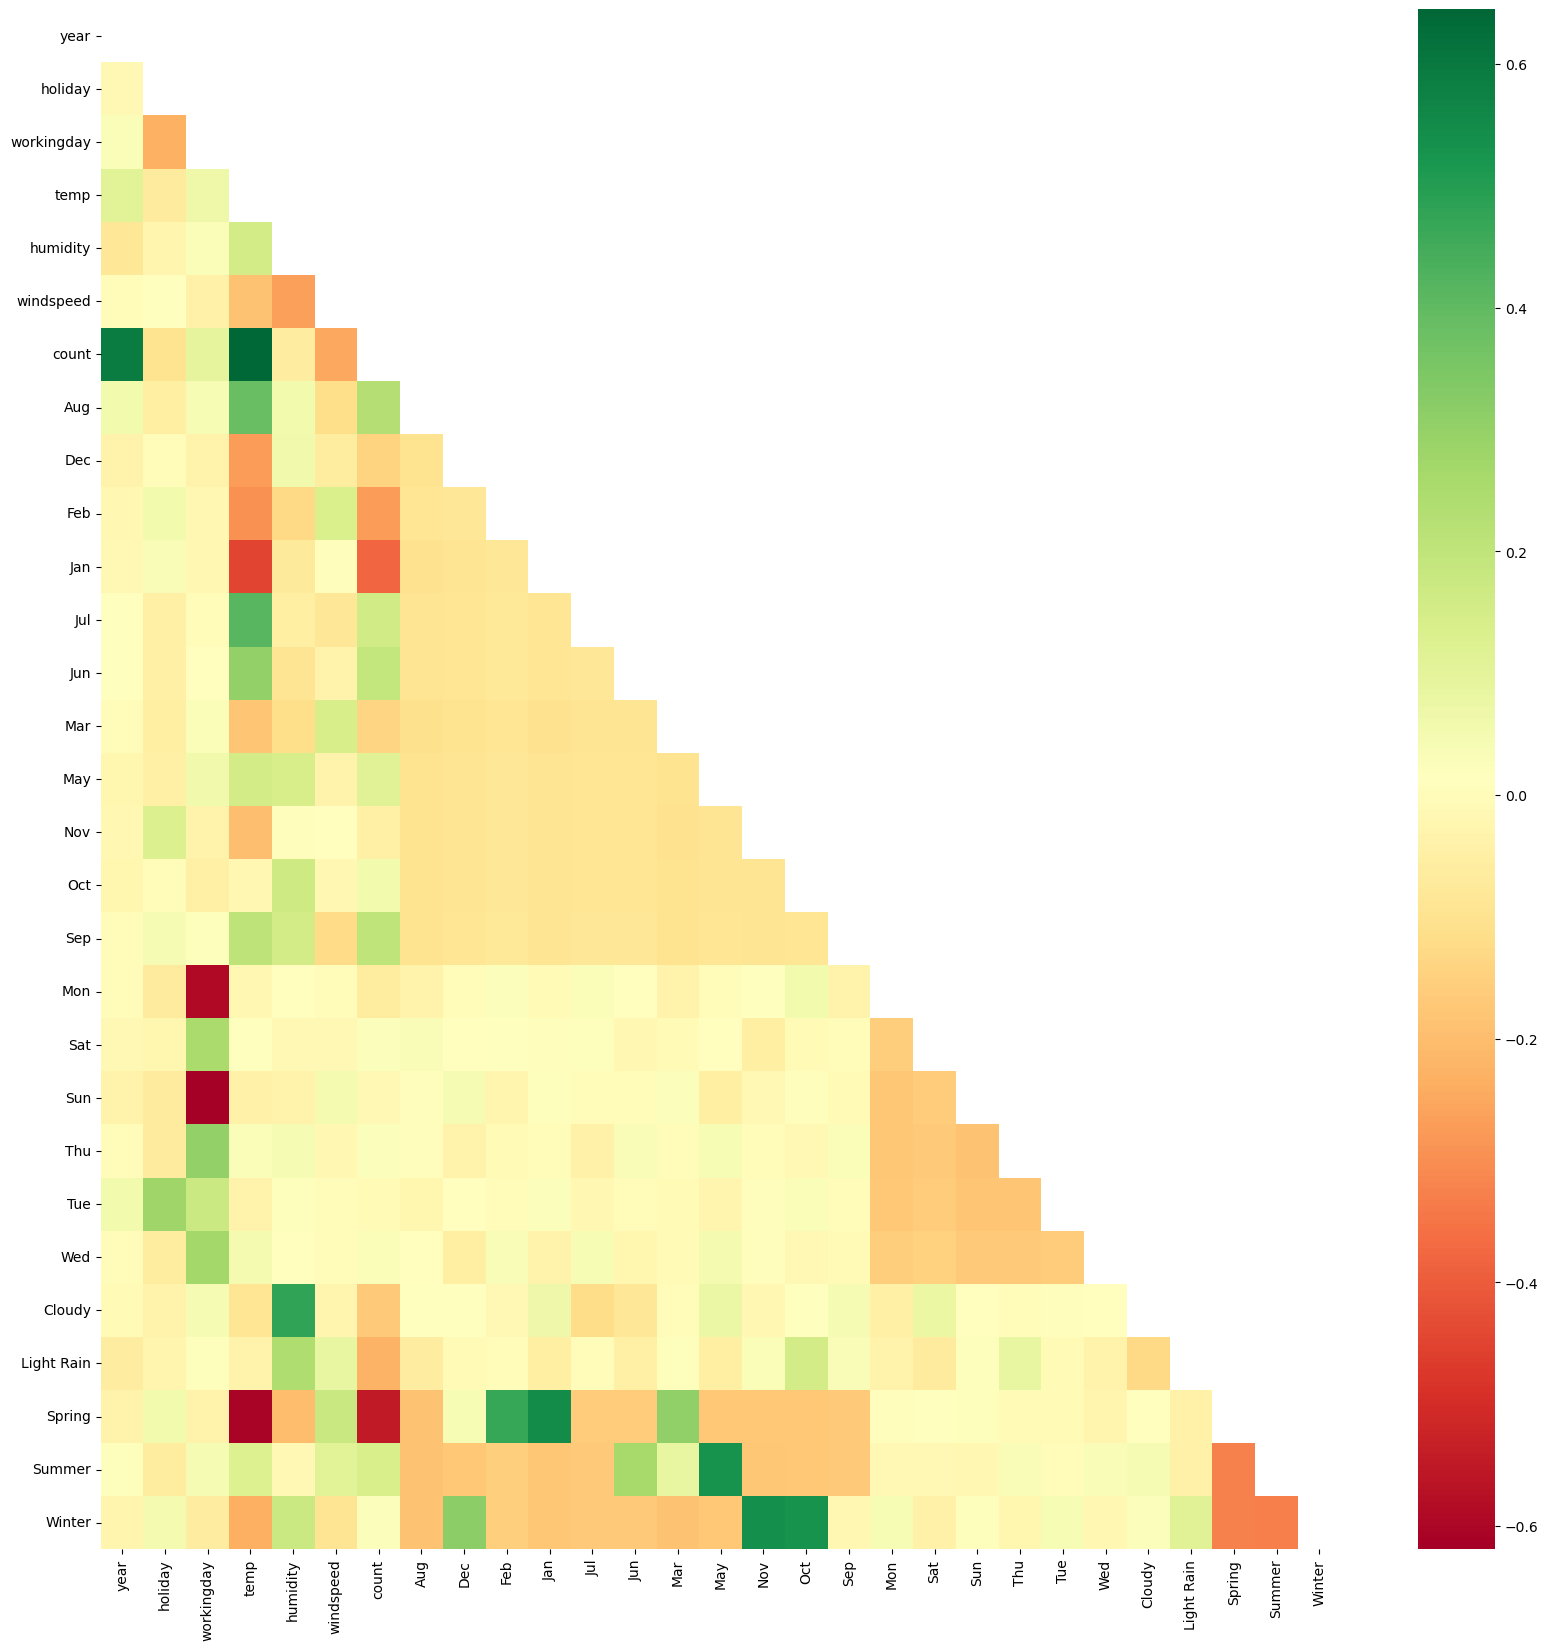

In [122]:
#checking correlation coeffs after scaling

plt.figure(figsize = (20,20))
matrix = np.triu(day_df_train.corr())
sns.heatmap(day_df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

In [123]:
#high correlation between count and temp
#visible correlation between Cloudy weather and Humidity
#strong correlation between: Spring and January, February; Summer and May; Winter and October, November 

**BUILDING MODEL USING RFE**

In [124]:
#divide the data into X and y

y_train = day_df_train.pop('count')
X_train = day_df_train

In [125]:
print(y_train.shape)
print(X_train.shape)

(510,)
(510, 28)


In [135]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [136]:
#initializing the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#applyinh RFE to select the top 15 features
rfe = RFE(model, n_features_to_select=15)
X_train_rfe = rfe.fit_transform(X_train, y_train) 

In [137]:
#checking selected columns
col = X_train.columns[rfe.support_]
print(col)

#checking rejected columns
X_train.columns[~rfe.support_]

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'Jan',
       'Jul', 'Sep', 'Sun', 'Cloudy', 'Light Rain', 'Spring', 'Summer',
       'Winter'],
      dtype='object')


Index(['Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Sat',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

In [138]:
#running the OLS model
import statsmodels.api as sm
ols_model = sm.OLS(y_train, sm.add_constant(X_train_rfe)).fit()  
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          4.22e-191
Time:                        02:01:33   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2519      0.036      6.969      0.0

In [141]:
#function to calc VIF of variables

def calcVIF(day_df):
    vif = pd.DataFrame()
    vif['Features'] = day_df.columns
    vif['VIF'] = [variance_inflation_factor(day_df.values, i) for i in range(day_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [143]:
X_train_rfe = X_train[col]
calcVIF(X_train_rfe)

,Features,VIF
4,humidity,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,Spring,4.53
14,Winter,3.46
13,Summer,2.85
10,Cloudy,2.29
0,year,2.09
9,Sun,1.98


In [144]:
#'humidity' shows high VIF, hence we will remove it

In [145]:
#building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          4.22e-191
Time:                        23:35:24   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2519      0.036      6.969      0.0

In [146]:
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

#calculating VIF for new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
11,Spring,3.07
12,Summer,2.34
0,year,2.08
13,Winter,1.98
8,Sun,1.97
5,Jan,1.62
6,Jul,1.59


In [147]:
#dropping the 'workingday','humidity', 'temp' is an important parameter
X_train_new = X_train_rfe.drop(['humidity', 'workingday'], axis=1)

# Calculate VIF for the new model
vif_new = calculateVIF(X_train_new)
print(vif_new)

      Features   VIF
2         temp  5.16
3    windspeed  4.64
10      Spring  2.76
11      Summer  2.24
0         year  2.07
12      Winter  1.80
4          Jan  1.61
5          Jul  1.59
8       Cloudy  1.56
6          Sep  1.34
7          Sun  1.19
9   Light Rain  1.08
1      holiday  1.05


In [148]:
#building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          2.48e-186
Time:                        23:40:37   Log-Likelihood:                 502.77
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     496   BIC:                            -918.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2120      0.030      6.978      0.0

In [150]:
#'Sun' shows high P value, can drop it
X_train_new = X_train_rfe.drop(['Sun','humidity', 'workingday'], axis=1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.13
3,windspeed,4.62
9,Spring,2.75
10,Summer,2.24
0,year,2.07
11,Winter,1.78
4,Jan,1.61
5,Jul,1.59
7,Cloudy,1.56
6,Sep,1.34


In [151]:
#building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          8.14e-187
Time:                        23:42:50   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2154      0.030      7.088      0.0

In [153]:
#dropping 'Jul' as it has lowest absolute coeff of -0.0503, also less significant based on the above analysis

X_train_new = X_train_rfe.drop(['Sun', 'humidity', 'workingday', 'Jul'], axis=1)

# Run the function to calculate VIF for the new model
vif_new = calculateVIF(X_train_new)
print(vif_new)

      Features   VIF
3    windspeed  4.61
2         temp  3.85
8       Spring  2.63
0         year  2.07
9       Summer  1.91
10      Winter  1.63
4          Jan  1.60
6       Cloudy  1.56
5          Sep  1.23
7   Light Rain  1.08
1      holiday  1.04


In [158]:
#building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.1
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          1.96e-186
Time:                        23:48:46   Log-Likelihood:                 497.40
No. Observations:                 510   AIC:                            -970.8
Df Residuals:                     498   BIC:                            -920.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2080      0.030      6.829      0.0

In [156]:
#VIFs and p-values both are within an acceptable range and thereseems to be very low multicollinearity between the predictors, 
#we can conclude this as best possible model

**RESIDUAL ANALYSIS**

In [157]:
lr_4.params

const         0.207978
year          0.234864
holiday      -0.095612
temp          0.458296
windspeed    -0.155470
Jan          -0.040339
Sep           0.090036
Cloudy       -0.077852
Light Rain   -0.286295
Spring       -0.050043
Summer        0.058266
Winter        0.087618
dtype: float64

In [159]:
y_train_pred = lr_4.predict(X_train_lm_4)

Text(0.5, 0, 'Errors')

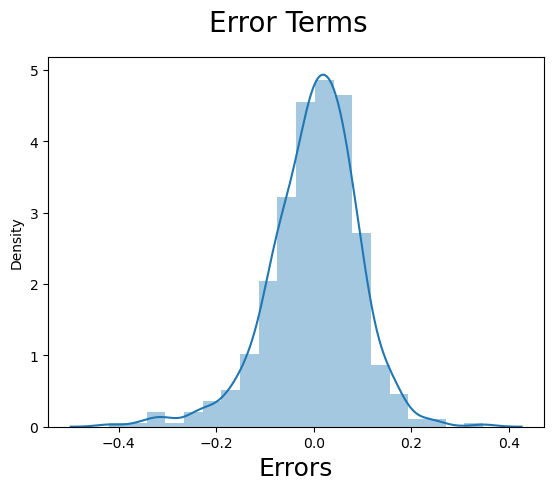

In [160]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

In [161]:
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.61
2,temp,3.85
8,Spring,2.63
0,year,2.07
9,Summer,1.91
10,Winter,1.63
4,Jan,1.60
6,Cloudy,1.56
5,Sep,1.23
7,Light Rain,1.08


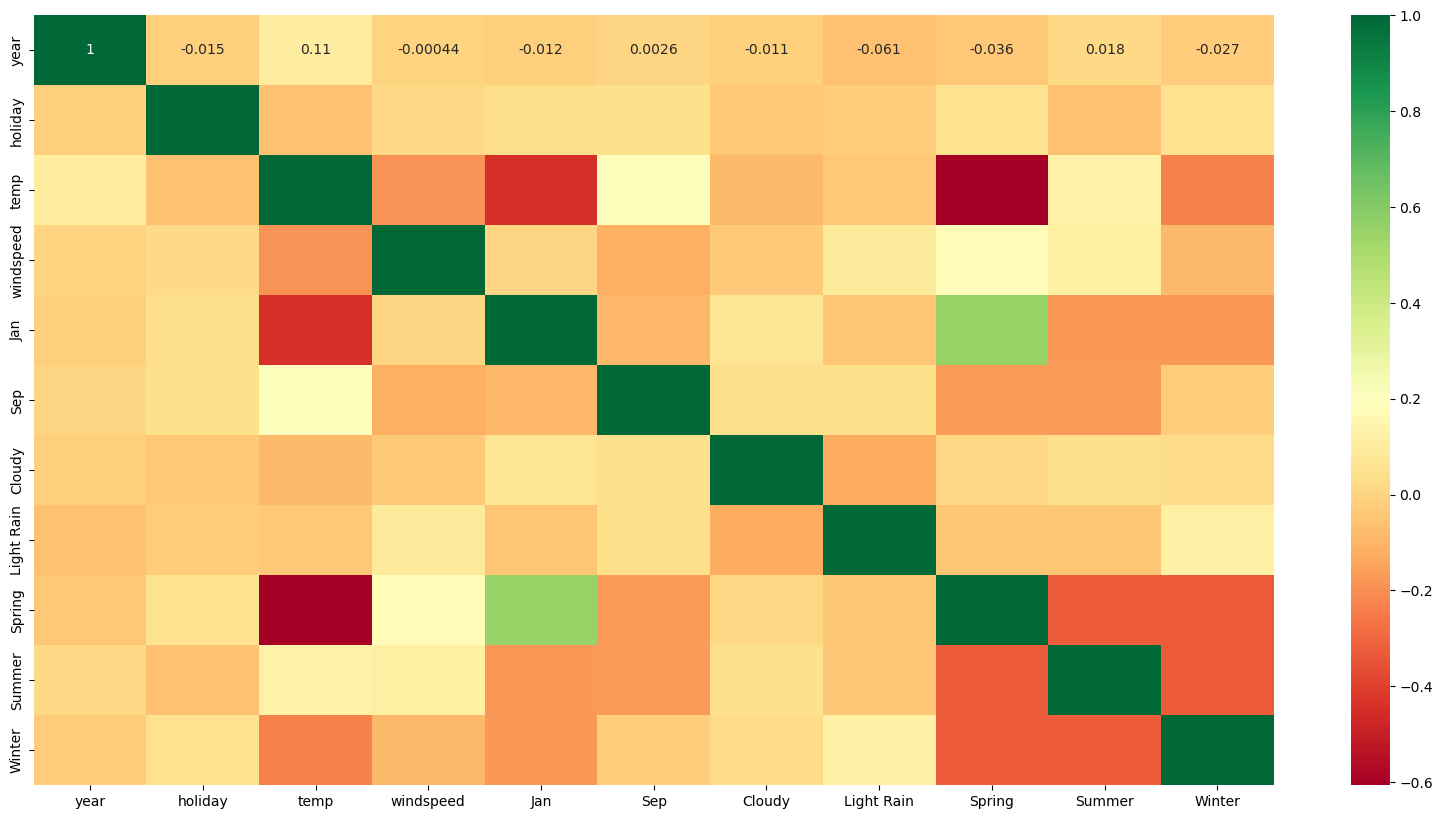

In [172]:
#multicollinearity

plt.figure(figsize=(20,10))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

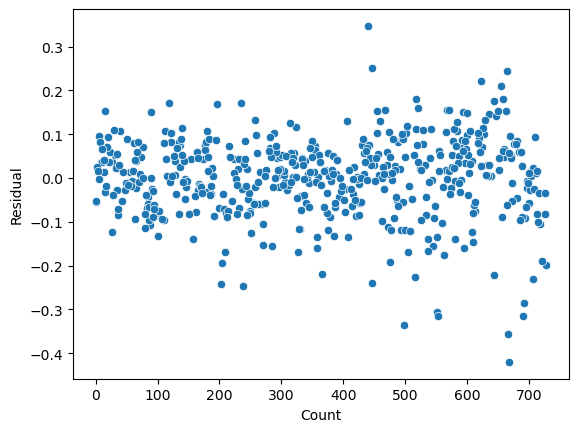

In [164]:
#homoscedasticity

y_train_pred = lr_4.predict(X_train_lm_4)
residual = y_train - y_train_pred
sns.scatterplot(residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

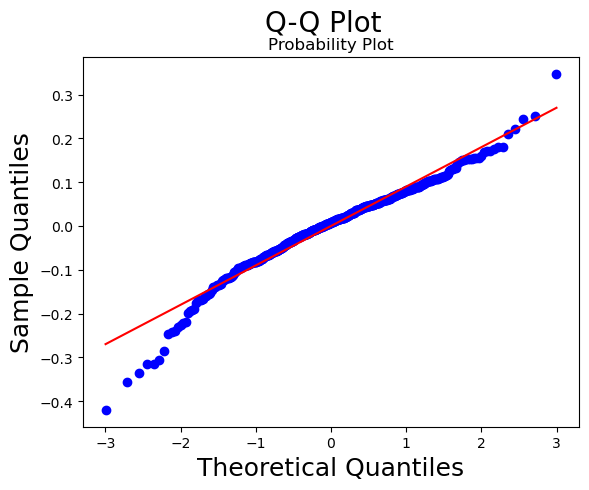

In [166]:
#normality

import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q plot
fig = plt.figure()
stats.probplot(y_train - y_train_pred, dist="norm", plot=plt)
fig.suptitle('Q-Q Plot', fontsize=20)
plt.xlabel('Theoretical Quantiles', fontsize=18)
plt.ylabel('Sample Quantiles', fontsize=18)
plt.show()

Text(0, 0.5, 'Error')

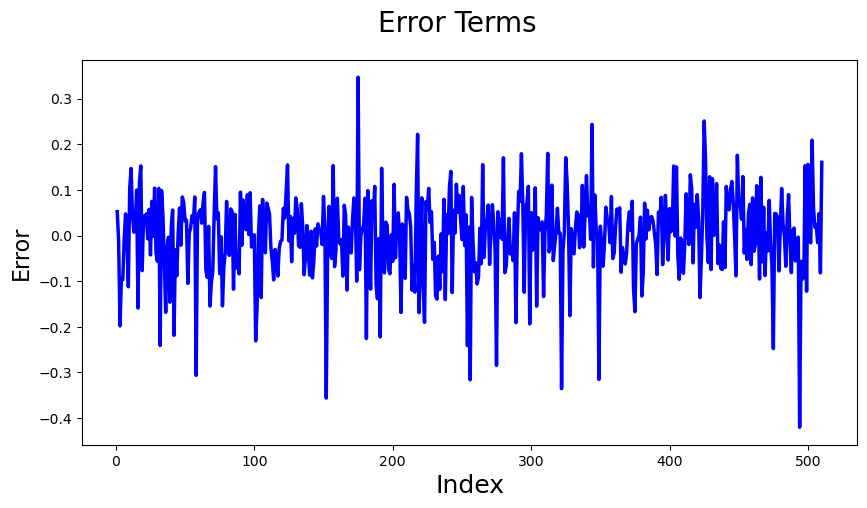

In [171]:
#error terms

c = [i for i in range(1,511,1)]
fig = plt.figure(figsize=(10,5))
plt.plot(c,y_train-y_train_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                     
plt.ylabel('Error', fontsize=16)   

**MAKING PREDICTIONS WITH FINAL MODEL**